# Cacuci (2018) analytical demonstration example 
## 1. Introduction
Cacuci (2018) presented a demonstration application of the adjoint state approach to calculating second-order sensitivities, as derived previously (Cacuci, 2015). The demonstration problem involved an ODE that described mass transport. First-order (1°) and second-order (2°) sensitivities of the solution to this problem were calculated using the adjoint state method. First-order sensitivities were compared to the results of direct differentiation. The various expressions derived for 1° and 2° sensitivities are summarised and compared here, with example outputs provided.

The structure of this notebook is organised as follows:
* The forward model of interest is described in Section 2.


* The first-level system of solutions is described in Section 3. This includes a single first-level adjoint state model, as well as calculations of first-order sensitivities using two independent methods. 


* The second-level system of solutions is described in Section 4. For each second-order sensitivity of interest, second-level adjoint state solutions are presented. For second-order sensitivities that are not found to be zero-valued, sensitivities are calculated using two independent methods. 

## 2. Forward model
The forward model governing equation is:

$\begin{align}
\;\;\;\;\;\;
\frac{d\rho(t)}{d t}+\rho(t)\sum_{i=1}^Nw_i\;\beta_i=q\sum_{i=1}^Nw_i\;\beta_i
\end{align}$

Alternatively, this can be expressed as: 

$\begin{align}
\;\;\;\;\;\;
\frac{d\rho(t)}{d t}&=-\rho(t)\sum_{i=1}^Nw_i\;\beta_i+q\sum_{i=1}^Nw_i\;\beta_i
\\
\\
\therefore\frac{d\rho(t)}{d t}&=\left[q-\rho(t)\right]\sum_{i=1}^Nw_i\;\beta_i
\end{align}$

With the initial condition specified as:

$\begin{align}
\;\;\;\;\;\;
\rho(0)=\rho_{in}
\end{align}$

Numerical integration can be used to solve this ODE, via the Scipy command "solve_ivp", which can be applied to the following callable function:

In [134]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad

def func(t, r, q, w, b):
    return (q-r)*np.sum(w*b)

def ivp(t, q, w, b):
    return solve_ivp(lambda t,r: func(t, r, q, w, b), [0., 10.], [r_in], t_eval=[t], args=[q, w, b]).y[0]

For example, for $t=[0,2,4,6,8,10]$, $\rho(t)$ can be calcuated by solving the forward model governing equation and initial condition for the following parameters: $\rho_{in}=0.0,\;q=1.0,\;w=[0.1, 0.2, 0.3]$, and $\beta=[0.4, 0.5, 0.6]$:

In [135]:
r_in = 0.
q = 1.
w = np.array([0.1, 0.2, 0.3])
b = np.array([0.4, 0.5, 0.6])
print '%14s%14s'% ('t', 'rho(t)')
for t in np.linspace(0., 10., 6):
    print '%14.1f%14.6f'% (t, ivp(t, q, w, b))

             t        rho(t)
           0.0      0.000000
           2.0      0.472793
           4.0      0.722004
           6.0      0.853309
           8.0      0.922766
          10.0      0.959137


Using integration by parts, Cacuci (2018) derived the following closed-form analytical solution to the forward model:

$\begin{align}
\;\;\;\;\;\;
\rho(t)=q+(\rho_{in}-q)\;\mathrm{exp}\left(-t\sum_{i=1}^Nw_i\;\beta_i\right)
\end{align}$

This can be coded as the following callable function:

In [136]:
def r(t, r_in, q, w, b):
    return q+(r_in-q)*np.exp(-t*np.sum(w*b))

Which can be used to calcuate a solution using the same parameter set as described above:

In [137]:
print '%14s%14s'% ('t', 'rho(t)')
for t in np.linspace(0., 10., 6):
    print '%14.1f%14.6f'% (t, r(t, r_in, q, w, b))

             t        rho(t)
           0.0      0.000000
           2.0      0.472708
           4.0      0.721963
           6.0      0.853393
           8.0      0.922695
          10.0      0.959238


The results of both methods for $t\in [0,10]$ can be compared as:

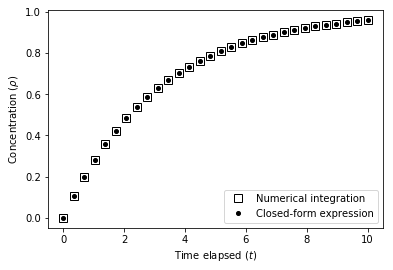

In [139]:
T = np.linspace(0., 10., 30)
%matplotlib inline
plt.plot(T, [ivp(t, q, w, b) for t in T], 's', ms=8, mec='k', mfc='none', label='Numerical integration')
plt.plot(T, [r(t, r_in, q, w, b) for t in T], 'ko', ms=4, label='Closed-form expression')
plt.xlabel(r'Time elapsed ($t$)')
plt.ylabel(r'Concentration $(\rho)$')
plt.legend(loc=4);

## 3. First-level system
## 3.1 First-level adjoint state model
Using the standard approach for deriving adjoint solutions, Cacuci (2018) derived the following governing equation for the adjoint state model of the forward model:

$\begin{align}
\;\;\;\;\;\;
-\frac{d\psi^{(1)}(t)}{d t}+\psi^{(1)}(t)\sum_{i=1}^Nw_i\;\beta_i=\delta(t-t_1)
\end{align}$

Alternatively, this can be expressed as: 

$\begin{align}
\;\;\;\;\;\;
\frac{d\psi^{(1)}(t)}{d t}=\psi^{(1)}(t)\sum_{i=1}^Nw_i\;\beta_i-\delta(t-t_1)
\end{align}$

With the terminal condition specified as:

$\begin{align}
\;\;\;\;\;\;
\psi^{(1)}(t_f)=0
\end{align}$

Using integration by parts, Cacuci (2018) derived the following closed-form analytical solution to the adjoint state model:

$\begin{align}
\;\;\;\;\;\;
\psi^{(1)}(t)=\left[1-H\left(t-t_1\right)\right]\mathrm{exp}\left[\left(t-t_1\right)\sum_{i=1}^Nw_i\;\beta_i\right]
\end{align}$

Where $H\left(t-t_1\right)$ is the Heaviside function; i.e. : $H=0$ for $t<t_1$ and $H=1$ for $t\geq t_1$.

Here $t_1$ is the time of interest at which sensitivities are calculated, which occurs between the initial time, $t=0$, and the final time, $t=t_f$.

This can be coded as the following callable function:

In [140]:
def psi1(t, t1, w, b):
    if t<=t1: # CHECK: LEQ, not LT?
        H=0.
    else:
        H=1.
    return (1.-H)*np.exp((t-t1)*np.sum(w*b))

For $t_f=10$, $t\in [0,10]$ and $t_1=5$, adjoint state variable values can be calculated as:

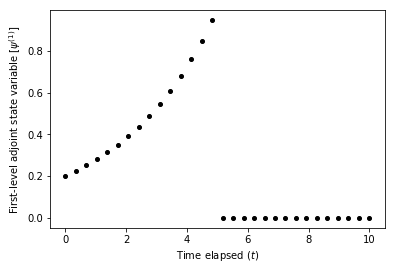

In [141]:
T  = np.linspace(0., 10., 30)
t1 = 5.
%matplotlib inline
plt.plot(T, [psi1(t, t1, w, b) for t in T], 'ko', ms=4, label='Closed-form analytical solution')
plt.xlabel(r'Time elapsed ($t$)')
plt.ylabel(r'First-level adjoint state variable $[\psi^{(1)}]$');

It can be observed that $\psi^{(1)}$ values at $t>t_1$ will be non-zero, while values at $t\leq t_1$ will not.

## 3.2 Calculation of first-order sensitivities
### 3.2.1 First-order sensitivity of forward model governing equation w.r.t $\rho_{in}$
Direct differentiation of the closed-form solution for the forward model results in the following expression for the first-order sensitivity w.r.t $\rho_{in}$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial \rho(t)}{\partial\rho_{in}} = \frac{\partial}{\partial\rho_{in}} \left[q+(\rho_{in}-q)\;\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)\right] = \mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)
\end{align}$

This can be coded as the following callable function:

In [142]:
def dr_dr_in(t, w, b):
    return np.exp(-t*np.sum(w*b))

Cacuci (2018) derived the following expression for the first-order sensitivity of forward model governing equation w.r.t $\rho_{in}$ as a function of the first-level adjoint state variable, $\psi^{(1)}$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial \rho(t)}{\partial\rho_{in}} = \psi^{(1)}(0)
\end{align}$

This can be coded as the following callable function:

In [143]:
def dr_dr_in_adj(t, w, b):
    return psi1(0, t, w, b)

The results of both methods for $t\in [0,10]$ can be compared as:

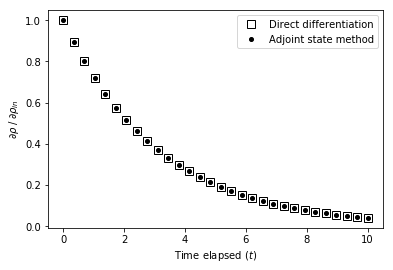

In [144]:
T = np.linspace(0., 10., 30)
%matplotlib inline
plt.plot(T, [dr_dr_in(t, w, b) for t in T], 's', ms=8, mec='k', mfc='none', label='Direct differentiation')
plt.plot(T, [dr_dr_in_adj(t, w, b) for t in T], 'ko', ms=4, label='Adjoint state method')
plt.xlabel(r'Time elapsed ($t$)')
plt.ylabel(r'$\partial\rho\;/\;\partial \rho_{in}$')
plt.legend(loc=1);

### 3.2.2 First-order sensitivity of forward model governing equation w.r.t $q$
Direct differentiation of the closed-form solution for the forward model results in the following expression for the first-order sensitivity w.r.t $q$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial \rho(t)}{\partial q} = \frac{\partial}{\partial q} \left[q+(\rho_{in}-q)\;\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)\right] = 1-\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)
\end{align}$

This can be coded as the following callable function:

In [145]:
def dr_dq(t, w, b):
    return 1.-np.exp(-t*np.sum(w*b))

Cacuci (2018) derived the following expression for the first-order sensitivity of forward model governing equation w.r.t $q$ as a function of the first-level adjoint state variable, $\psi^{(1)}$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial \rho(t)}{\partial q} = \left(\sum_{i=1}^N w_i\;\beta_i\right) \int_0^{t_f} \psi^{(1)}(t)\;dt
\end{align}$

This can be coded as the following callable function, which uses numerical integration to compute the definite integral:

In [156]:
def dr_dq_adj(t, t1, w, b):
    return np.sum(w*b)*quad(psi1, 0, t, args=(t1, w, b))[0]

The results of both methods for $t\in [0,10]$ can be compared as:

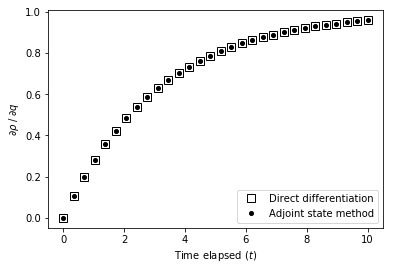

In [186]:
T = np.linspace(0., 10., 30)
%matplotlib inline
plt.plot(T, [dr_dq(t, w, b) for t in T], 's', ms=8, mec='k', mfc='none', label='Direct differentiation')
plt.plot(T, [dr_dq_adj(t1, t1, w, b) for t1 in T], 'ko', ms=4, label='Adjoint state method')
plt.xlabel(r'Time elapsed ($t$)')
plt.ylabel(r'$\partial\rho\;/\;\partial q$')
plt.legend(loc=4);

### 3.2.3 First-order sensitivity of forward model governing equation w.r.t $w_j$
Direct differentiation of the closed-form solution for the forward model results in the following expression for the first-order sensitivity w.r.t $w_j$:


$\begin{align}
\;\;\;\;\;\;
\frac{\partial \rho(t)}{\partial w_j} = \frac{\partial}{\partial w_j} \left[q+(\rho_{in}-q)\;\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)\right] = -\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)(\rho_{in}-q)\;t\sum_{i=1}^N \beta_i
\end{align}$

This can be coded as the following callable function:

In [187]:
 def dr_dwj(t, r_in, q, w, b):
    return -np.exp(-t*np.sum(w*b))*(r_in-q)*t*np.sum(b)

Cacuci (2018) derived the following expression for the first-order sensitivity of forward model governing equation w.r.t $w_j$ as a function of the first-level adjoint state variable, $\psi^{(1)}$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial \rho(t)}{\partial w_j} = \beta_j \int_0^{t_f} \psi^{(1)}(t)\;\left[q-\rho(t)\right]\;dt
\end{align}$

This can be coded as the following callable function, which uses numerical integration to compute the definite integral:

In [188]:
def dr_dwj_adj(t, t1, tf, q, j, w, b):
    integrand = lambda t: psi1(t, t1, w, b)*(q-r(t, r_in, q, w, b))
    return b[j]*quad(integrand, 0, tf)[0]

The results of both methods for $t\in [0,10]$ and $j=1$ can be compared as:

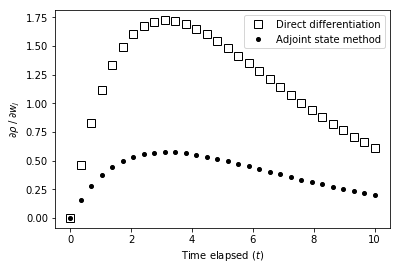

In [190]:
T = np.linspace(0., 10., 30)
j = 1
%matplotlib inline
plt.plot(T, [dr_dwj(t, r_in, q, w, b) for t in T], 's', ms=8, mec='k', mfc='none', label='Direct differentiation')
plt.plot(T, [dr_dwj_adj(t1, t1, T[-1], q, j, w, b) for t1 in T], 'ko', ms=4, label='Adjoint state method')
plt.xlabel(r'Time elapsed ($t$)')
plt.ylabel(r'$\partial\rho\;/\;\partial w_j$')
plt.legend(loc=1);

### 3.2.4 First-order sensitivity of forward model governing equation w.r.t $\beta_j$
Direct differentiation of the closed-form solution for the forward model results in the following expression for the first-order sensitivity w.r.t $\beta_j$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial \rho(t)}{\partial \beta_j} = \frac{\partial}{\partial \beta_j} \left[q+(\rho_{in}-q)\;\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)\right] = -\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)(\rho_{in}-q)\;t\sum_{i=1}^N w_i
\end{align}$

This can be coded as the following callable function:

In [191]:
def dr_dbj(t, r_in, q, w, b):
    return -np.exp(-t*np.sum(w*b))*(r_in-q)*t*np.sum(w)

Cacuci (2018) derived the following expression for the first-order sensitivity of forward model governing equation w.r.t $\beta_j$ as a function of the first-level adjoint state variable, $\psi^{(1)}$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial \rho(t)}{\partial \beta_j} = w_j \int_0^{t_f} \psi^{(1)}(t)\;\left[q-\rho(t)\right]\;dt
\end{align}$

This can be coded as the following callable function, which uses numerical integration to compute the definite integral:

In [192]:
def dr_dbj_adj(t, t1, tf, q, j, w, b):
    integrand = lambda t: psi1(t, t1, w, b)*(q-r(t, r_in, q, w, b))
    return w[j]*quad(integrand, 0, tf)[0]

The results of both methods for $t\in [0,10]$ and $j=1$ can be compared as:

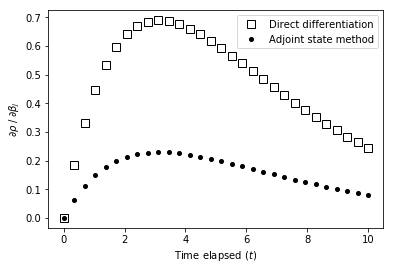

In [193]:
T = np.linspace(0., 10., 30)
j = 1
%matplotlib inline
plt.plot(T, [dr_dbj(t, r_in, q, w, b) for t in T], 's', ms=8, mec='k', mfc='none', label='Direct differentiation')
plt.plot(T, [dr_dbj_adj(t1, t1, T[-1], q, j, w, b) for t1 in T], 'ko', ms=4, label='Adjoint state method')
plt.xlabel(r'Time elapsed ($t$)')
plt.ylabel(r'$\partial\rho\;/\;\partial \beta_j$')
plt.legend(loc=1);

## 4. Second-level system
## 4.1 Second-order sensitivity $\partial\rho_{in}$
### 4.1.1 Second-order adjoint state model associated with $\partial\rho_{in}$

Cacuci (2018) derived the following governing equations for the two second-order adjoint state models associated with $\partial\rho_{in}$:

$\begin{align}
\;\;\;\;\;\;
\frac{d\psi_{\rho_{in}}^{(2,1)}(t)}{d t}+\psi_{\rho_{in}}^{(2,1)}(t)\sum_{i=1}^Nw_i\;\beta_i =& \;\delta(t)
\\
\\
\;\;\;\;\;\;
-\frac{d\psi_{\rho_{in}}^{(2,2)}(t)}{d t}+\psi_{\rho_{in}}^{(2,2)}(t)\sum_{i=1}^Nw_i\;\beta_i =& \;0
\\
\\
\end{align}$

With initial and terminal conditions specified as:

$\begin{align}
\;\;\;\;\;\;
\psi_{\rho_{in}}^{(2,1)}(0) =& \;0
\\
\\
\;\;\;\;\;\;
\psi_{\rho_{in}}^{(2,2)}(t_f) =& \;0
\\
\\
\end{align}$

Using integration by parts, Cacuci (2018) derived the following two closed-form analytical solutions to the adjoint state models:

$\begin{align}
\;\;\;\;\;\;
\psi_{\rho_{in}}^{(2,1)}(t) =& \;H(t)\;\mathrm{exp}\left(-t\sum_{i=1}^Nw_i\;\beta_i\right)
\\
\\
\;\;\;\;\;\;
\psi_{\rho_{in}}^{(2,2)}(t) \equiv& \;0
\\
\\
\end{align}$

The former expression can be coded as the following callable function:

In [173]:
def psi21r_in(t, w, b):
    if t<0:
        H=0.
    else:
        H=1.
    return H*np.exp(-t*np.sum(w*b))

### 4.1.2 Second-order sensitivity of forward model governing equation w.r.t $\rho_{in}$

Direct differentiation of the closed-form solution for the first-order sensitivity $\frac{\partial \rho(t)}{\partial \rho_{in}}$ w.r.t $\rho_{in}$ results in the following expression for the second-order sensitivity $\frac{\partial^2 \rho(t)}{\partial \rho_{in}^2}$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial^2\rho(t)}{\partial \rho_{in}^2} = \frac{\partial^2}{\partial \rho_{in}^2} \left[\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)\right] = 0
\end{align}$

This expression is equal to zero, as the expression for first-order sensitivity is not a function of $\rho_{in}$.

Cacuci (2018) derived the following expression for the second-order sensitivity of forward model governing equation w.r.t $\rho_{in}$ as a function of the second-level adjoint state variable, $\psi_{\rho_{in}}^{(2,2)}$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial^2\rho(t)}{\partial \rho_{in}^2} = \psi_{\rho_{in}}^{(2,2)}(0) = 0
\end{align}$

After solution of the second-level adjoint state governing equation, the value of the second-level adjoint state variable was found to be equal to zero at all times; therefore the value of this expression is also zero.

## 4.2 Second-order sensitivity $\partial q$
### 4.2.1 Second-order adjoint state model associated with $\partial q$

Cacuci (2018) derived the following governing equations for the two second-order adjoint state models associated with $\partial q$:

$\begin{align}
\;\;\;\;\;\;
\frac{d\psi_q^{(2,1)}(t)}{d t}+\psi_q^{(2,1)}(t)\sum_{i=1}^Nw_i\;\beta_i =& \;\sum_{i=1}^Nw_i\;\beta_i
\\
\\
\;\;\;\;\;\;
-\frac{d\psi_q^{(2,2)}(t)}{d t}+\psi_q^{(2,2)}(t)\sum_{i=1}^Nw_i\;\beta_i =& \;0
\\
\\
\end{align}$

With initial and terminal conditions specified as:

$\begin{align}
\;\;\;\;\;\;
\psi_q^{(2,1)}(0) =& \;0
\\
\\
\;\;\;\;\;\;
\psi_q^{(2,2)}(t_f) =& \;0
\\
\\
\end{align}$

Using integration by parts, Cacuci (2018) derived the following two closed-form analytical solutions to the adjoint state models:

$\begin{align}
\;\;\;\;\;\;
\psi_q^{(2,1)}(t) =& \;1-\mathrm{exp}\left(-t\sum_{i=1}^Nw_i\;\beta_i\right)
\\
\\
\;\;\;\;\;\;
\psi_q^{(2,2)}(t) \equiv& \;0
\\
\\
\end{align}$

The former expression can be coded as the following callable function:

In [174]:
def psi21q(t, w, b):
    return 1.-np.exp(-t*np.sum(w*b))

### 4.2.2 Second-order sensitivity of forward model governing equation w.r.t $q$

Direct differentiation of the closed-form solution for the first-order sensitivity $\frac{\partial \rho(t)}{\partial q}$ w.r.t $q$ results in the following expression for the second-order sensitivity $\frac{\partial^2 \rho(t)}{\partial q^2}$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial^2\rho(t)}{\partial q^2} = \frac{\partial^2}{\partial q^2} \left[1-\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)
\right] = 0
\end{align}$

This expression is equal to zero, as the expression for first-order sensitivity is not a function of $q$.

Cacuci (2018) derived the following expression for the second-order sensitivity of forward model governing equation w.r.t $q$ as a function of the second-level adjoint state variable, $\psi_q^{(2,2)}$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial^2\rho(t)}{\partial q^2} = \left(\sum_{i=1}^N w_i\;\beta_i\right) \int_0^{t_f} \psi_q^{(2,2)}(t)\;dt=0
\end{align}$

After solution of the second-level adjoint state governing equation, the value of the second-level adjoint state variable was found to be equal to zero at all times; therefore the value of this expression is also zero.

## 4.3 Second-order sensitivity $\partial w_j$
### 4.3.1 Second-order adjoint state model associated with $\partial w_j$

Cacuci (2018) derived the following governing equation for the two second-order adjoint state models associated with $\partial w_j$:

$\begin{align}
\;\;\;\;\;\;
\frac{d\psi_{w_j}^{(2,1)}(t)}{d t}+\psi_{w_j}^{(2,1)}(t)\sum_{i=1}^Nw_i\;\beta_i =& \;\beta_j\left[q-\rho(t)\right]
\\
\\
\;\;\;\;\;\;
\frac{d\psi_{w_j}^{(2,2)}(t)}{d t}-\psi_{w_j}^{(2,2)}(t)\sum_{i=1}^Nw_i\;\beta_i =& \;\beta_j\;\psi^{(1)}(t)
\\
\\
\end{align}$

With initial and terminal conditions specified as:

$\begin{align}
\;\;\;\;\;\;
\psi_{w_j}^{(2,1)}(0) =& \;0
\\
\\
\;\;\;\;\;\;
\psi_{w_j}^{(2,2)}(t_f) =& \;0
\\
\\
\end{align}$

Using integration by parts, Cacuci (2018) derived the following two closed-form analytical solutions to the adjoint state models:

$\begin{align}
\;\;\;\;\;\;
\psi_{w_j}^{(2,1)}(t) =& \;\beta_j\left(q-\rho_{in}\right)t\;\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)
\\
\\
\;\;\;\;\;\;
\psi_{w_j}^{(2,2)}(t) =& \;H\left(t-t_1\right)\;\beta_j\left(t-t_1\right)\;\mathrm{exp}\left[\left(t-t_1\right)\sum_{i=1}^N w_i\;\beta_i\right]
\\
\\
\end{align}$

These expressions can be coded as the following callable functions:

In [194]:
def psi21w(t, r_in, q, w, b, j):
    return b[j]*(q-r_in)*t*np.exp(-t*np.sum(w*b))

def psi22w(t, t1, r_in, q, w, b, j):
    if t<t1:
        H=0.
    else:
        H=1.
    return H*b[j]*(q-r_in)*t*np.exp(-t*np.sum(w*b))

### 4.3.2 Second-order sensitivity of forward model governing equation w.r.t $w_j$

Direct differentiation of the closed-form solution for the first-order sensitivity $\frac{\partial \rho(t)}{\partial w_j}$ w.r.t $w_j$ results in the following expression for the second-order sensitivity:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial^2\rho(t)}{\partial w_j^2} = \frac{\partial\rho(t)}{\partial w_j}\left[-\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)(\rho_{in}-q)\;t\sum_{i=1}^N \beta_i\right] = (\rho_{in}-q)\;\beta_j^2\;t^2\;\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)
\end{align}$

This can be coded as the following callable function:

In [195]:
 def d2r_dwj2(t, r_in, q, w, b, j):
    return (r_in-q)*(b[j]**2.)*(t**2.)*np.exp(-t*np.sum(w*b))

Cacuci (2018) derived the following expression for the second-order sensitivity of forward model governing equation w.r.t $w_j$ as a function of the second-level adjoint state variables $\psi_{w_j}^{(2,1)}$ and $\psi_{w_j}^{(2,2)}$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial^2\rho(t)}{\partial w_j^2} = \beta_j \int_0^{t_f} \psi_{w_j}^{(2,2)}(t)\left[q-\rho(t)\right]\;dt-\beta_j\int_0^{t_f} \psi_{w_j}^{(2,1)}(t)\;\psi^{(1)}\;dt
\end{align}$

This can be coded as the following callable function, which uses numerical integration to compute the definite integrals:

In [198]:
def d2r_dwj2_adj(t, t1, tf, r_in, q, w, b, j):
    integrand1 = lambda t: psi21w(t, r_in, q, w, b, j)*psi1(t, t1, w, b)
    integrand2 = lambda t: psi22w(t, t1, r_in, q, w, b, j)*(q-r(t, r_in, q, w, b))
    return b[j]*(quad(integrand2, 0., tf)[0]-quad(integrand1, 0., tf)[0])   

The results of both methods for $t\in [0,10]$ can be compared as:

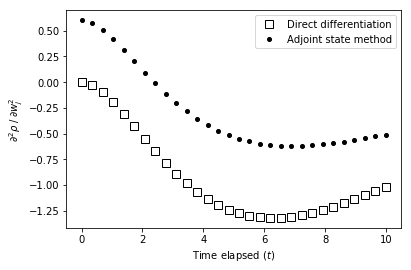

In [199]:
T = np.linspace(0., 10., 30)
j  = 1
%matplotlib inline
plt.plot(T, [d2r_dwj2(t, r_in, q, w, b, j) for t in T], 's', ms=8, mec='k', mfc='none', label='Direct differentiation')
plt.plot(T, [d2r_dwj2_adj(t1, t1, tf, r_in, q, w, b, j) for t1 in T], 'ko', ms=4, label='Adjoint state method')
plt.xlabel(r'Time elapsed ($t$)')
plt.ylabel(r'$\partial^2 \rho\;/\;\partial w_j^2$')
plt.legend(loc=1);

## 4.4 Second-order sensitivity $\partial\beta_j$
### 4.4.1 Second-order adjoint state model associated with $\partial\beta_j$

Cacuci (2018) derived the following governing equation for the two second-order adjoint state models associated with $\partial \beta_j$:

$\begin{align}
\;\;\;\;\;\;
\frac{d\psi_{\beta_j}^{(2,1)}(t)}{d t}+\psi_{\beta_j}^{(2,1)}(t)\sum_{i=1}^Nw_i\;\beta_i =& \;w_j\left[q-\rho(t)\right]
\\
\\
\;\;\;\;\;\;
\frac{d\psi_{\beta_j}^{(2,2)}(t)}{d t}-\psi_{\beta_j}^{(2,2)}(t)\sum_{i=1}^Nw_i\;\beta_i =& \;w_j\;\psi^{(1)}(t)
\\
\\
\end{align}$

With initial and terminal conditions specified as:

$\begin{align}
\;\;\;\;\;\;
\psi_{\beta_j}^{(2,1)}(0) =& \;0
\\
\\
\;\;\;\;\;\;
\psi_{\beta_j}^{(2,2)}(t_f) =& \;0
\\
\\
\end{align}$

Using integration by parts, Cacuci (2018) derived the following two closed-form analytical solutions to the adjoint state models:

$\begin{align}
\;\;\;\;\;\;
\psi_{\beta_j}^{(2,1)}(t) =& \;w_j\left(q-\rho_{in}\right)t\;\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)
\\
\\
\;\;\;\;\;\;
\psi_{\beta_j}^{(2,2)}(t) =& \;H\left(t-t_1\right)\;w_j\left(t-t_1\right)\;\mathrm{exp}\left[\left(t-t_1\right)\sum_{i=1}^N w_i\;\beta_i\right]
\\
\\
\end{align}$

These expressions can be coded as the following callable functions:

In [200]:
def psi21b(t, r_in, q, w, b, j):
    return w[j]*(q-r_in)*t*np.exp(-t*np.sum(w*b))

def psi22b(t, t1, r_in, q, w, b, j):
    if t<t1:
        H=0.
    else:
        H=1.
    return H*w[j]*(q-r_in)*t*np.exp(-t*np.sum(w*b))

### 4.4.2 Second-order sensitivity of forward model governing equation w.r.t $\beta_j$

Direct differentiation of the closed-form solution for the first-order sensitivity $\frac{\partial \rho(t)}{\partial \beta_j}$ w.r.t $\beta_j$ results in the following expression for the second-order sensitivity:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial^2\rho(t)}{\partial \beta_j^2} = \frac{\partial^2}{\partial \beta_j^2}\left[-\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)(\rho_{in}-q)\;t\sum_{i=1}^N w_i\right] = (\rho_{in}-q)\;w_j^2\;t^2\;\mathrm{exp}\left(-t\sum_{i=1}^N w_i\;\beta_i\right)
\end{align}$

This can be coded as the following callable function:

In [201]:
 def d2r_dbj2(t, r_in, q, w, b, j):
    return (r_in-q)*(w[j]**2.)*(t**2.)*np.exp(-t*np.sum(w*b))

Cacuci (2018) derived the following expression for the second-order sensitivity of forward model governing equation w.r.t $w_j$ as a function of the second-level adjoint state variables $\psi_{\beta_j}^{(2,1)}$ and $\psi_{\beta_j}^{(2,2)}$:

$\begin{align}
\;\;\;\;\;\;
\frac{\partial^2\rho(t)}{\partial \beta_j^2} = w_j \int_0^{t_f} \psi_{\beta_j}^{(2,2)}(t)\left[q-\rho(t)\right]\;dt-w_j\int_0^{t_f} \psi_{\beta_j}^{(2,1)}(t)\;\psi^{(1)}(t)\;dt
\end{align}$

This can be coded as the following callable function, which uses numerical integration to compute the definite integrals:

In [204]:
def d2r_dbj2_adj(t, t1, tf, r_in, q, w, b, j):
    integrand1 = lambda t: psi21b(t, r_in, q, w, b, j)*psi1(t, t1, w, b)
    integrand2 = lambda t: psi22b(t, t1, r_in, q, w, b, j)*(q-r(t, r_in, q, w, b))
    return w[j]*(quad(integrand2, 0., tf)[0]-quad(integrand1, 0., tf)[0])   

The results of both methods for $t\in [0,10]$ and $j=1$ can be compared as:

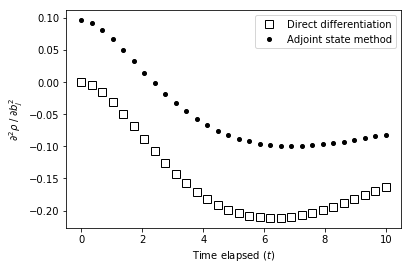

In [205]:
T = np.linspace(0., 10., 30)
j = 1
%matplotlib inline
plt.plot(T, [d2r_dbj2(t, r_in, q, w, b, j) for t in T], 's', ms=8, mec='k', mfc='none', label='Direct differentiation')
plt.plot(T, [d2r_dbj2_adj(t1, t1, tf, r_in, q, w, b, j) for t1 in T], 'ko', ms=4, label='Adjoint state method')
plt.xlabel(r'Time elapsed ($t$)')
plt.ylabel(r'$\partial^2 \rho\;/\;\partial b_j^2$')
plt.legend(loc=1);